In [30]:
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [31]:
df = pd.read_csv("combined_df.csv", index_col=0)
df[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]] = df[["medianAlt", "medianSpeed", "medianResDist", "csm_1", "csm_2"]].fillna(-1)
df["csm"] = df["csm_2"].apply(lambda v: -1 if v == -1 else 0 if v < 0.25 else 1)
df.describe()

,potential_bolide_id,potential_bolide_longitude,potential_bolide_latitude,confidence_x,confidence_y,_id,yaw_flip_flag,maxEnergy,totEnergy,nGroups,duration,latLonLinelets,energyRatio,splinelets,groundTrackDeviation,chop,glint,neighborhood,latLonLinearity,medianAlt_g16,medianSpeed_g16,medianResDist_g16,medianAlt_g17,medianSpeed_g17,medianResDist_g17,phase,moon_fullness,solarhour,sun_alt_obs,sun_alt_app,csm_1,csm_2,csm_1_17,csm_2_17,csm_2_16,csm_1_16,medianAlt,medianSpeed,medianResDist,csm
count,1.046200e+04,10462.000000,10462.000000,10462.000000,10462.000000,1.046200e+04,10462.000000,1.046200e+04,1.046200e+04,10462.000000,10462.000000,1.046200e+04,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,3211.000000,3155.000000,3211.000000,3211.000000,3155.000000,3211.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,6244.000000,6499.000000,7219.000000,6906.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,1.670407e+18,-87.148347,3.601100,0.625546,0.625546,1.670407e+18,0.591092,6.264099e+00,5.888253e+02,80.812369,0.231162,4.891630e+00,0.527657,0.002362,0.852568,0.012114,5511.177680,2.082681,0.742186,58.080970,65.286836,5.532964,58.080471,67.558957,5.532964,0.488264,0.499358,9.286280,7.392259,7.328547,0.377022,0.369244,0.736064,0.722009,0.671229,0.685639,17.133071,19.332560,1.005099,0.550946
std,5.000122e+16,73.344535,25.120392,0.306245,0.306245,5.000122e+16,0.912619,6.407166e+02,6.022736e+04,178.726562,0.456445,4.778883e+02,0.180490,0.003501,33.950905,0.018633,3152.547260,91.983063,0.260694,32.557276,231.374621,32.207530,32.557939,237.012072,32.207530,0.288409,0.287409,5.756323,41.233293,41.237418,0.724817,0.706302,0.295533,0.269117,0.287680,0.318352,32.677854,117.118216,18.093840,0.792877
min,1.620192e+18,-179.999374,-56.537132,0.200069,0.200069,1.620192e+18,0.000000,1.285030e-15,2.218620e-14,20.000000,0.022126,2.555835e-14,0.000000,0.000000,0.000432,0.000000,4.593179,0.000000,0.005218,9.167527,0.056485,0.006051,9.173078,0.000000,0.006051,0.000019,0.000003,0.001867,-88.451701,-88.451701,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.620210e+18,-128.302391,-15.850136,0.298573,0.298573,1.620210e+18,0.000000,5.584514e-15,1.407766e-13,26.000000,0.069428,7.570421e-11,0.438458,0.000539,0.005727,0.000000,3392.679474,0.000000,0.548289,15.775042,0.624227,1.594395,15.774445,0.672190,1.594395,0.237668,0.244627,5.020162,-25.131102,-25.131102,0.148147,0.225339,0.544748,0.542497,0.463430,0.453355,-1.000000,-1.000000,-1.000000,0.000000
50%,1.720192e+18,-99.512493,5.634765,0.663504,0.663504,1.720192e+18,0.000000,1.098387e-14,3.033284e-13,39.000000,0.123216,2.382963e-10,0.534224,0.001320,0.008247,0.000000,5170.720946,0.000000,0.801423,77.382745,8.145276,3.172864,77.382513,20.754300,3.172864,0.481271,0.495826,8.177124,9.671023,9.581787,0.673771,0.647313,0.862540,0.804092,0.738883,0.795939,-1.000000,-1.000000,-1.000000,1.000000
75%,1.720203e+18,-63.486264,22.711296,0.952000,0.952000,1.720203e+18,2.000000,2.508217e-14,7.789268e-13,72.000000,0.236515,7.406727e-10,0.630079,0.002945,0.015766,0.020833,7258.230318,0.000000,0.997102,85.285183,78.737991,5.836398,85.282451,81.868300,5.836398,0.738424,0.749574,12.438772,40.697847,40.679415,0.949403,0.891535,0.992240,0.960099,0.931756,0.978489,15.083587,0.562104,1.190934,1.000000
max,1.720222e+18,179.988892,56.449947,1.000000,1.000000,1.720222e+18,2.000000,6.553500e+04,6.160290e+06,6799.000000,14.052796,4.886167e+04,1.000000,0.077194,3308.090866,0.243902,20015.086796,9260.136364,1.000000,108.444170,7758.017464,1572.705731,108.441648,8979.397522,1572.705731,0.999999,0.999913,23.998081,89.502041,89.501931,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,108.442909,6501.974879,1572.705731,1.000000


In [32]:
target_columns = ['yaw_flip_flag', 'maxEnergy', 'totEnergy',
       'nGroups', 'duration', 'latLonLinelets', 'energyRatio', 'splinelets',
       'groundTrackDeviation', 'chop', 'glint', 'neighborhood',
       'latLonLinearity', 'medianAlt', 'medianSpeed',
       'medianResDist', 'phase', 'moon_fullness', 'solarhour',
       'sun_alt_obs', 'sun_alt_app', 'csm']

bolides_df = df.loc[df.is_bolide, target_columns]
nbolides_df = df.loc[~df.is_bolide, target_columns]

In [33]:
#Importing libraries
import os
import math

import numpy as np
import matplotlib.pyplot as plt
## import cv2
import pandas as pd
import random
import seaborn as sns
from scipy.cluster.vq import vq
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from scipy import spatial
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [34]:
X = df[target_columns]
y = df["is_bolide"].astype(int)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((7532, 22), (1883, 22), (1047, 22), (7532,), (1883,), (1047,))

In [35]:
# use standard scaler to rescale by running fit and transform on hand coded train features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# apply the same transform to val and test
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#CSM all

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


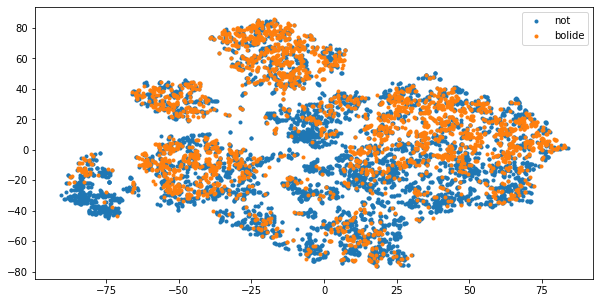

In [36]:
# use tSNE to plot hand coded train features after PCA dimensionality reduction in 2D
tsne = TSNE(n_components=2, random_state=42)
# rescale train PCA data so tSNE can treat dimensions with equal importance
tsne_X = tsne.fit_transform(scaler.fit_transform(X_train))
# plot tSNE of rescaled train PCA data
tsne_plot_x = tsne_X[:, 0]
tsne_plot_y = tsne_X[:, 1]
check_x_0 = tsne_plot_x[y_train == 0]
check_y_0 = tsne_plot_y[y_train == 0]
check_x_1 = tsne_plot_x[y_train == 1]
check_y_1 = tsne_plot_y[y_train == 1]
plt.plot(check_x_0, check_y_0, ".", label = 'not')
plt.plot(check_x_1, check_y_1, ".", label = 'bolide')
_ = plt.legend()

In [37]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’} 
# init and fit rbf svc model to train PCA data
rbf_clf = svm.SVC(kernel='rbf', random_state=42)
rbf_clf.fit(X_train, y_train)
# print validation scores and classification metrics
rbf_validation_score = rbf_clf.score(X_val, y_val)
rbf_validation_score

0.7812002124269782

In [38]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, random_state=42) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8080229226361032


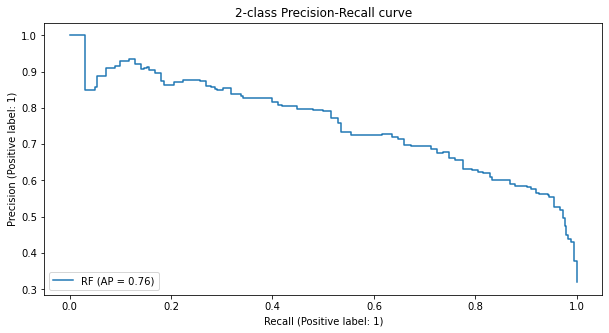

In [39]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="RF"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

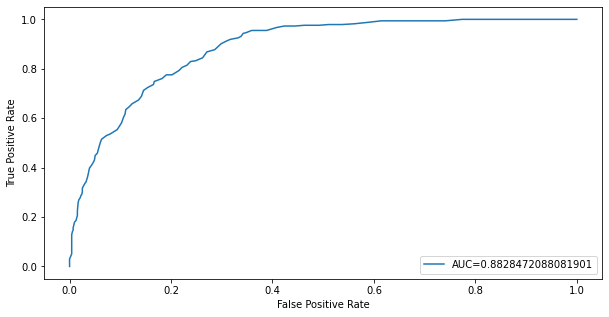

In [40]:
#define metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [41]:
# conda install tensorflow
# conda install xgboost

In [42]:
import pandas as pd
import numpy as np 
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Gradient Boost, Default Perams

In [43]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb = GradientBoostingClassifier(learning_rate=learning_rate)
    gb.fit(X_train, y_train)
    predictions = gb.predict(X_val)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.809
Accuracy score (validation): 0.801
Learning rate:  0.075
Accuracy score (training): 0.822
Accuracy score (validation): 0.810
Learning rate:  0.1
Accuracy score (training): 0.833
Accuracy score (validation): 0.809
Learning rate:  0.25
Accuracy score (training): 0.863
Accuracy score (validation): 0.809
Learning rate:  0.5
Accuracy score (training): 0.906
Accuracy score (validation): 0.802
Learning rate:  0.75
Accuracy score (training): 0.921
Accuracy score (validation): 0.801
Learning rate:  1
Accuracy score (training): 0.930
Accuracy score (validation): 0.781


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1261
           1       0.68      0.64      0.66       622

    accuracy                           0.78      1883
   macro avg       0.75      0.74      0.75      1883
weighted avg       0.78      0.78      0.78      1883

Confusion Matrix:


<AxesSubplot:>

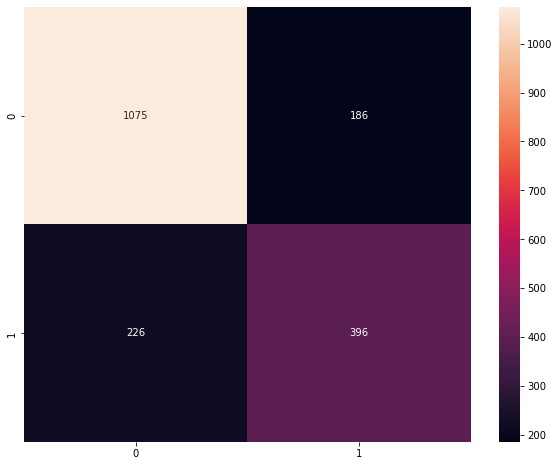

In [44]:
print("Classification Report")
print(classification_report(y_val, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

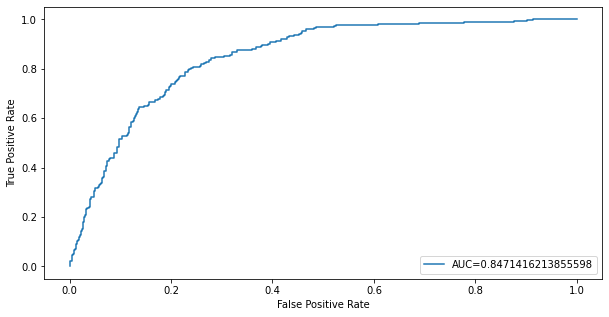

In [45]:
#define metrics
y_pred_proba = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Gradient Boost, estimators = 100, max features = 2, max_depth = 2

In [46]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=None)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.765
Accuracy score (validation): 0.771
Learning rate:  0.075
Accuracy score (training): 0.787
Accuracy score (validation): 0.782
Learning rate:  0.1
Accuracy score (training): 0.800
Accuracy score (validation): 0.795
Learning rate:  0.25
Accuracy score (training): 0.822
Accuracy score (validation): 0.805
Learning rate:  0.5
Accuracy score (training): 0.834
Accuracy score (validation): 0.807
Learning rate:  0.75
Accuracy score (training): 0.839
Accuracy score (validation): 0.812
Learning rate:  1
Accuracy score (training): 0.841
Accuracy score (validation): 0.804


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1261
           1       0.74      0.62      0.67       622

    accuracy                           0.80      1883
   macro avg       0.78      0.76      0.76      1883
weighted avg       0.80      0.80      0.80      1883

Confusion Matrix:


<AxesSubplot:>

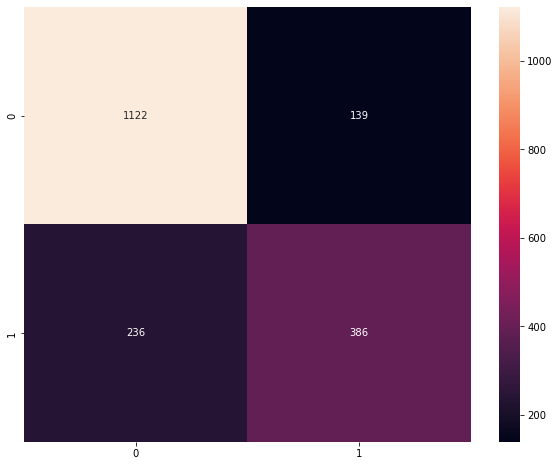

In [47]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=2, max_depth=2, random_state=None)
gb_clf.fit(X_train, y_train)
predictions = gb_clf.predict(X_val)

print("Classification Report")
print(classification_report(y_val, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

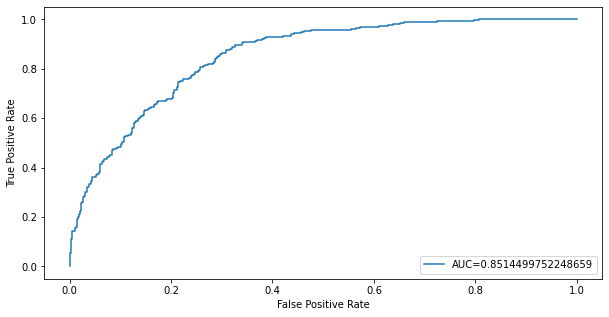

In [48]:
#define metrics
y_pred_proba = gb_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Gradient Boost, estimators = 100, max features = None, max_depth = 3

In [49]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=None, max_depth=3, random_state=None)
    gb_clf2.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf2.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf2.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.809
Accuracy score (validation): 0.801
Learning rate:  0.075
Accuracy score (training): 0.822
Accuracy score (validation): 0.810
Learning rate:  0.1
Accuracy score (training): 0.833
Accuracy score (validation): 0.809
Learning rate:  0.25
Accuracy score (training): 0.863
Accuracy score (validation): 0.809
Learning rate:  0.5
Accuracy score (training): 0.906
Accuracy score (validation): 0.802
Learning rate:  0.75
Accuracy score (training): 0.921
Accuracy score (validation): 0.801
Learning rate:  1
Accuracy score (training): 0.930
Accuracy score (validation): 0.780


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1261
           1       0.73      0.66      0.70       622

    accuracy                           0.81      1883
   macro avg       0.79      0.77      0.78      1883
weighted avg       0.81      0.81      0.81      1883

Confusion Matrix:


<AxesSubplot:>

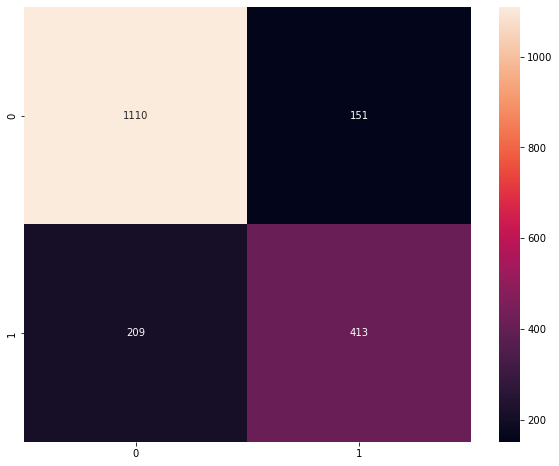

In [50]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=None, max_depth=3, random_state=None)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Classification Report")
print(classification_report(y_val, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

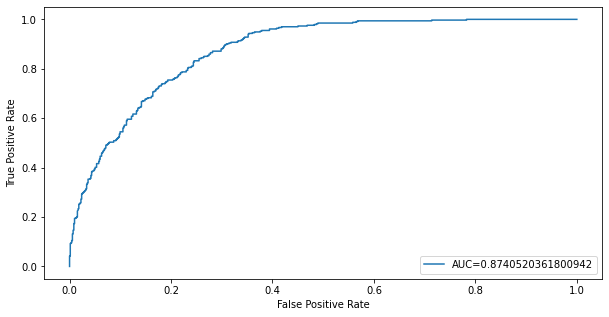

In [51]:
#define metrics
y_pred_proba = gb_clf2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## XGBoost

In [19]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [20]:
score = xgb_clf.score(X_val, y_val)
print(score)

0.8130642591609134


In [21]:
for learning_rate in lr_list:
    xgb = XGBClassifier(learning_rate=learning_rate)
    xgb.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(xgb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(xgb.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.875
Accuracy score (validation): 0.813
Learning rate:  0.075
Accuracy score (training): 0.893
Accuracy score (validation): 0.811
Learning rate:  0.1
Accuracy score (training): 0.913
Accuracy score (validation): 0.818
Learning rate:  0.25
Accuracy score (training): 0.972
Accuracy score (validation): 0.808
Learning rate:  0.5
Accuracy score (training): 0.999
Accuracy score (validation): 0.802
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.792
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.788


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1261
           1       0.73      0.71      0.72       622

    accuracy                           0.82      1883
   macro avg       0.79      0.79      0.79      1883
weighted avg       0.82      0.82      0.82      1883

Confusion Matrix:


<AxesSubplot:>

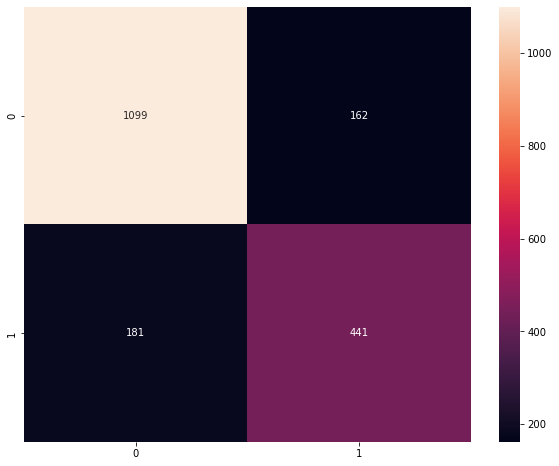

In [22]:
xgb = XGBClassifier(learning_rate=0.1)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_val)

print("Classification Report")
print(classification_report(y_val, predictions))

print("Confusion Matrix:")
con = confusion_matrix(y_val, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt='d')

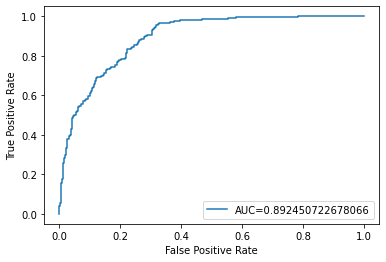

In [23]:
#define metrics
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## CNN Experimenting

In [24]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [25]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [26]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=10)

2022-10-13 18:42:49.796952: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1475 - accuracy: 0.9566
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0514 - accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0330 - accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0228 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0144 - accuracy: 0.9954
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0103 - accuracy: 0.9968
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0087 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0058 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0053 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 19s 10m

In [27]:
#evaluting the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0528 - accuracy: 0.9861


[0.05278381332755089, 0.9861000180244446]